In [1]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import data from combined csv
df = pd.read_csv('data/combined_data.csv')
df = df.drop('Unnamed: 0', axis=1)
df
 

,video_id,trending_date,category_id,publish_time,views,likes,dislikes,comment_count,video_error_or_removed,Country Code
0,2kyS6SvSYSE,17.14.11,22,2017-11-13T17:13:01.000Z,748374,57527,2966,15954,False,US
1,1ZAPwfrtAFY,17.14.11,24,2017-11-13T07:30:00.000Z,2418783,97185,6146,12703,False,US
2,5qpjK5DgCt4,17.14.11,23,2017-11-12T19:05:24.000Z,3191434,146033,5339,8181,False,US
3,puqaWrEC7tY,17.14.11,24,2017-11-13T11:00:04.000Z,343168,10172,666,2146,False,US
4,d380meD0W0M,17.14.11,24,2017-11-12T18:01:41.000Z,2095731,132235,1989,17518,False,US
5,gHZ1Qz0KiKM,17.14.11,28,2017-11-13T19:07:23.000Z,119180,9763,511,1434,False,US
6,39idVpFF7NQ,17.14.11,24,2017-11-12T05:37:17.000Z,2103417,15993,2445,1970,False,US
7,nc99ccSXST0,17.14.11,28,2017-11-12T21:50:37.000Z,817732,23663,778,3432,False,US
8,jr9QtXwC9vc,17.14.11,1,2017-11-13T14:00:23.000Z,826059,3543,119,340,False,US
9,TUmyygCMMGA,17.14.11,25,2017-11-13T13:45:16.000Z,256426,12654,1363,2368,False,US


In [3]:
#talk to group about dropping the following video_id's
#'#NAME?', '#VALUE!'
df_id_drop = df.drop(df[df['video_id'] == '#NAME?'].index, inplace = True)
df_value_drop = df.drop(df[df['video_id'] == '#VALUE!'].index, inplace = True)

In [4]:
#talk to group about dropping the following video_id's
#when likes and dislikes == 0 or comment_count == 0 or video_error_or_removed == True

df_like_drop = df.drop(df[df['likes'] == 0].index, inplace = True)
df_dislikes_drop = df.drop(df[df['dislikes'] == 0].index, inplace = True)
df_comment_count_drop = df.drop(df[df['comment_count'] == 0].index, inplace = True)
df_video_error_or_removed = df.drop(df[df['video_error_or_removed'] == True].index, inplace = True)
df

,video_id,trending_date,category_id,publish_time,views,likes,dislikes,comment_count,video_error_or_removed,Country Code
0,2kyS6SvSYSE,17.14.11,22,2017-11-13T17:13:01.000Z,748374,57527,2966,15954,False,US
1,1ZAPwfrtAFY,17.14.11,24,2017-11-13T07:30:00.000Z,2418783,97185,6146,12703,False,US
2,5qpjK5DgCt4,17.14.11,23,2017-11-12T19:05:24.000Z,3191434,146033,5339,8181,False,US
3,puqaWrEC7tY,17.14.11,24,2017-11-13T11:00:04.000Z,343168,10172,666,2146,False,US
4,d380meD0W0M,17.14.11,24,2017-11-12T18:01:41.000Z,2095731,132235,1989,17518,False,US
5,gHZ1Qz0KiKM,17.14.11,28,2017-11-13T19:07:23.000Z,119180,9763,511,1434,False,US
6,39idVpFF7NQ,17.14.11,24,2017-11-12T05:37:17.000Z,2103417,15993,2445,1970,False,US
7,nc99ccSXST0,17.14.11,28,2017-11-12T21:50:37.000Z,817732,23663,778,3432,False,US
8,jr9QtXwC9vc,17.14.11,1,2017-11-13T14:00:23.000Z,826059,3543,119,340,False,US
9,TUmyygCMMGA,17.14.11,25,2017-11-13T13:45:16.000Z,256426,12654,1363,2368,False,US


In [5]:
#the data appears to include data for the following time range, by trending date:
#dec 1, 2017 through May 31, 2018


In [6]:
#compare number of views to likes/dislikes votes?
#compare number of views to comments?
# How long a video trends to number of views?
#Top Genres?
#Most commented, Most disliked, Most liked, longest trending video, most viewed video?
total_count = len(df["category_id"].unique())
total_count

17

In [7]:
#dataframes for each country
US = df.loc[df["Country Code"]=="US"]
MX = df.loc[df["Country Code"]=="MX"]
CA = df.loc[df["Country Code"]=="CA"]
RU = df.loc[df["Country Code"]=="RU"]
DE = df.loc[df["Country Code"]=="DE"]
FR = df.loc[df["Country Code"]=="FR"]
GB = df.loc[df["Country Code"]=="GB"]
IN = df.loc[df["Country Code"]=="IN"]
JP = df.loc[df["Country Code"]=="JP"]
KR = df.loc[df["Country Code"]=="KR"]
 

In [8]:
#dataframes created to display country, video_id, views, likes

data_us = US.loc[:,["Country Code", "video_id", "views", "likes", "dislikes", "comment_count"]]
#data_us
data_mx = MX.loc[:,["Country Code", "video_id", "views", "likes", "dislikes", "comment_count"]]
#data_mx

data_ca = CA.loc[:,["Country Code", "video_id", "views", "likes", "dislikes", "comment_count"]]
#data_ca

data_ru = RU.loc[:,["Country Code", "video_id", "views", "likes", "dislikes", "comment_count"]]
#data_ru

data_de = DE.loc[:,["Country Code", "video_id", "views", "likes", "dislikes", "comment_count"]]
#data_de

data_fr = FR.loc[:,["Country Code", "video_id", "views", "likes", "dislikes", "comment_count"]]
#data_fr
 
data_gb = GB.loc[:,["Country Code", "video_id", "views", "likes", "dislikes", "comment_count"]]
#data_gb

data_in = IN.loc[:,["Country Code", "video_id", "views", "likes", "dislikes", "comment_count"]]
#data_in

data_jp = JP.loc[:,["Country Code", "video_id", "views", "likes", "dislikes", "comment_count"]]
#data_jp

data_kr = KR.loc[:,["Country Code", "video_id", "views", "likes", "dislikes", "comment_count"]]
#data_kr

In [9]:
#sorted by views to see the highest trending video by country
trending_us = data_us.sort_values("views", axis=0, ascending=False)
trending_us.head()



,Country Code,video_id,views,likes,dislikes,comment_count
38547,US,VYOjWnS4cMY,225211923,5023450,343541,517232
38345,US,VYOjWnS4cMY,220490543,4962403,338105,512337
38146,US,VYOjWnS4cMY,217750076,4934188,335462,509799
37935,US,VYOjWnS4cMY,210338856,4836448,326902,501722
37730,US,VYOjWnS4cMY,205643016,4776680,321493,496211


In [10]:
# How many likes and dislikes were made out of the total amount of views
likes = (trending_us['views']/trending_us['likes'])
dislikes = (trending_us['views']/trending_us['dislikes'])
view = trending_us['views']

# Create a dataframe with percentages of likes and dislikes, how many views it takes to get one like
comment = trending_us["comment_count"]
total = (trending_us['likes']+trending_us['dislikes'])
percent_likes = (trending_us['likes'] /total) *100
percent_dislikes = (trending_us['dislikes'] /total) *100

# Create a variable for my data frame
percentages_us = {"Views": view, "Comments": comment, "Views per like": likes, "Views per dislike": dislikes, "Percent of Likes": percent_likes,
               "Percent of Dislikes": percent_dislikes }

# data frame coding and printing
percent_data_us = pd.DataFrame(percentages_us)
percent_data_us.head()


,Views,Comments,Views per like,Views per dislike,Percent of Likes,Percent of Dislikes
38547,225211923,517232,44.832122,655.560539,93.599002,6.400998
38345,220490543,512337,44.432212,652.136298,93.621272,6.378728
38146,217750076,509799,44.130884,649.105043,93.634074,6.365926
37935,210338856,501722,43.490358,643.430924,93.668800,6.331200
37730,205643016,496211,43.051453,639.650058,93.693957,6.306043


In [11]:
#total likes, dislikes, comments, and views
views_us = data_us["views"]
total_views_us = views_us.sum(axis=0)

comments_us = data_us["comment_count"]
total_comments_us = comments_us.sum(axis=0)

dislikes_us = data_us["dislikes"]
total_dislikes_us = dislikes_us.sum(axis=0)

likes_us = data_us["likes"]
total_likes_us = likes_us.sum(axis=0)

#Print out the data
print("The United States has",total_likes_us, "total YouTube Video likes")
print("The United States has",total_dislikes_us, "total YouTube Video dislikes")
print("The United States has",total_comments_us, "total YouTube video comments")
print("The United States has",total_views_us, "total YouTube video views")


The United States has 3026444622 total YouTube Video likes
The United States has 150245200 total YouTube Video dislikes
The United States has 345758876 total YouTube video comments
The United States has 94977105506 total YouTube video views


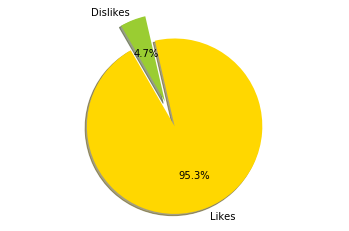

<Figure size 432x288 with 0 Axes>

In [62]:
# Data to plot
labels = 'Likes', 'Dislikes',
sizes = [total_likes_us, total_dislikes_us]
colors = ['gold', 'yellowgreen']
explode = (0.3, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=120)

plt.axis('equal')
plt.show()

#save pie chart as an image
plt.savefig('images/UnitedStates.png')

In [13]:
trending_mx = data_mx.sort_values("views", axis=0, ascending=False)
trending_mx.head()

,Country Code,video_id,views,likes,dislikes,comment_count
285662,MX,FlsCjmMhFmw,100912384,2656698,1353667,682890
285399,MX,FlsCjmMhFmw,75969469,2251864,1127834,827784
284272,MX,6ZfuNTqbHE8,74789251,2444976,46173,330715
284005,MX,6ZfuNTqbHE8,66637636,2331375,41155,316180
316194,MX,7C2z4GqqS5E,62796390,4470923,119053,905925


In [14]:
# How many likes and dislikes were made out of the total amount of views
likes = (trending_mx['views']/trending_mx['likes'])
dislikes = (trending_mx['views']/trending_mx['dislikes'])
view = trending_mx['views']

# Create a dataframe with percentages of likes and dislikes, how many views it takes to get one like
comment = trending_mx["comment_count"]
total = (trending_mx['likes']+trending_mx['dislikes'])
percent_likes = (trending_mx['likes'] /total) *100
percent_dislikes = (trending_mx['dislikes'] /total) *100

# Create a variable for my data frame
percentages_mx = {"Views": view, "Comments": comment, "Views per like": likes, "Views per dislike": dislikes, "Percent of Likes": percent_likes,
               "Percent of Dislikes": percent_dislikes}

# data frame coding and printing
percent_data_mx = pd.DataFrame(percentages_mx)
percent_data_mx.head()

,Views,Comments,Views per like,Views per dislike,Percent of Likes,Percent of Dislikes
285662,100912384,682890,37.984138,74.547421,66.245791,33.754209
285399,75969469,827784,33.736260,67.358733,66.629149,33.370851
284272,74789251,330715,30.588951,1619.761571,98.146518,1.853482
284005,66637636,316180,28.582976,1619.186879,98.265354,1.734646
316194,62796390,905925,14.045509,527.465835,97.406239,2.593761


In [15]:
#total likes, dislikes, comments, and views
views_mx = data_mx["views"]
total_views_mx = views_mx.sum(axis=0)

comments_mx = data_mx["comment_count"]
total_comments_mx = comments_mx.sum(axis=0)

dislikes_mx = data_mx["dislikes"]
total_dislikes_mx = dislikes_mx.sum(axis=0)

likes_mx = data_mx["likes"]
total_likes_mx = likes_mx.sum(axis=0)

#Print out the data
print("The country Mexico has",total_likes_mx, "total YouTube Video likes")
print("The country Mexico has",total_dislikes_mx, "total YouTube Video dislikes")
print("The country Mexico has",total_comments_mx, "total YouTube video comments")
print("The country Mexico has",total_views_mx, "total YouTube video views")


The country Mexico has 631747332 total YouTube Video likes
The country Mexico has 29704154 total YouTube Video dislikes
The country Mexico has 81535914 total YouTube video comments
The country Mexico has 13233400392 total YouTube video views


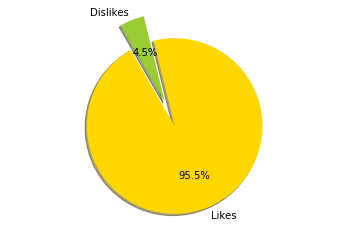

<Figure size 432x288 with 0 Axes>

In [63]:
# Data to plot
labels = 'Likes', 'Dislikes'
sizes = [total_likes_mx,total_dislikes_mx]
colors = ['gold', 'yellowgreen']
explode = (0.3, 0,)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=120)

plt.axis('equal')
plt.show()

#save pie chart as an image
plt.savefig('images/Mexico.png')

In [17]:
trending_ca = data_ca.sort_values("views", axis=0, ascending=False)
trending_ca.head()

,Country Code,video_id,views,likes,dislikes,comment_count
46849,CA,FlsCjmMhFmw,137843120,3014479,1602383,817582
46572,CA,FlsCjmMhFmw,125431369,2912715,1545018,807558
46347,CA,FlsCjmMhFmw,113876217,2811217,1470387,787174
46146,CA,FlsCjmMhFmw,100911567,2656678,1353655,682890
75310,CA,VYOjWnS4cMY,98938809,3037318,161813,319502


In [18]:
likes = (trending_ca['views']/trending_ca['likes'])

dislikes = (trending_ca['views']/trending_ca['dislikes'])
view = trending_ca['views']

vid_id = trending_ca["video_id"]
total = (trending_ca['likes']+trending_ca['dislikes'])
percent_likes = (trending_ca['likes'] /total) *100
percent_dislikes = (trending_ca['dislikes'] /total) *100

percentages_ca = {"Vid Id": vid_id, "Views": view, "Views per like": likes, "Views per dislike": dislikes, "Percent of Likes": percent_likes,
               "Percent of Dislikes": percent_dislikes }

percent_data_ca = pd.DataFrame(percentages_ca)
percent_data_ca.head()

,Vid Id,Views,Views per like,Views per dislike,Percent of Likes,Percent of Dislikes
46849,FlsCjmMhFmw,137843120,45.727013,86.023828,65.292811,34.707189
46572,FlsCjmMhFmw,125431369,43.063386,81.184406,65.340724,34.659276
46347,FlsCjmMhFmw,113876217,40.507800,77.446425,65.658034,34.341966
46146,FlsCjmMhFmw,100911567,37.984117,74.547478,66.245820,33.754180
75310,VYOjWnS4cMY,98938809,32.574399,611.439186,94.941970,5.058030


In [19]:
#total likes, dislikes, comments, and views
views_ca = data_ca["views"]
total_views_ca = views_ca.sum(axis=0)

comments_ca = data_ca["comment_count"]
total_comments_ca = comments_ca.sum(axis=0)

dislikes_ca = data_ca["dislikes"]
total_dislikes_ca = dislikes_ca.sum(axis=0)

likes_ca = data_ca["likes"]
total_likes_ca = likes_ca.sum(axis=0)

#Print out the data
print("The country Canada has",total_likes_ca,"total YouTube Video likes")
print("The country Canada has",total_dislikes_ca, "total YouTube Video dislikes")
print("The country Canada has",total_comments_ca, "total YouTube video comments")
print("The country Canada has",total_views_ca, "total YouTube video views")


The country Canada has 1608468398 total YouTube Video likes
The country Canada has 81378095 total YouTube Video dislikes
The country Canada has 205751957 total YouTube video comments
The country Canada has 46015685626 total YouTube video views


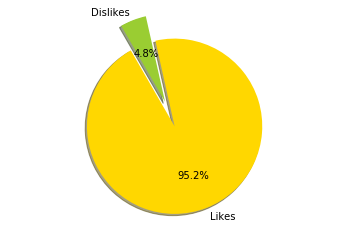

<Figure size 432x288 with 0 Axes>

In [64]:
# Data to plot
labels = 'Likes', 'Dislikes'
sizes = [total_likes_ca,total_dislikes_ca]
colors = ['gold', 'yellowgreen']
explode = (0.3, 0,)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=120)

plt.axis('equal')
plt.show()

#save pie chart as an image
plt.savefig('images/Canada.png')

In [21]:
trending_ru = data_ru.sort_values("views", axis=0, ascending=False)
trending_ru.head()

,Country Code,video_id,views,likes,dislikes,comment_count
275350,RU,7C2z4GqqS5E,62796390,4470923,119053,905925
275500,RU,7C2z4GqqS5E,62796390,4470923,119053,905925
244495,RU,FlsCjmMhFmw,52611730,1891836,884967,702790
275190,RU,7C2z4GqqS5E,39349927,3880074,72707,692311
273039,RU,VYOjWnS4cMY,31648454,1405392,51548,149478


In [22]:
likes = (trending_ru['views']/trending_ru['likes'])

dislikes = (trending_ru['views']/trending_ru['dislikes'])
view = trending_ru['views']

vid_id = trending_ru["video_id"]
total = (trending_ru['likes']+trending_ru['dislikes'])
percent_likes = (trending_ru['likes'] /total) *100
percent_dislikes = (trending_ru['dislikes'] /total) *100

percentages_ru = {"Vid Id": vid_id, "Views": view, "Views per like": likes, "Views per dislike": dislikes, "Percent of Likes": percent_likes,
               "Percent of Dislikes": percent_dislikes }

percent_data_ru = pd.DataFrame(percentages_ru)
percent_data_ru.head()

,Vid Id,Views,Views per like,Views per dislike,Percent of Likes,Percent of Dislikes
275350,7C2z4GqqS5E,62796390,14.045509,527.465835,97.406239,2.593761
275500,7C2z4GqqS5E,62796390,14.045509,527.465835,97.406239,2.593761
244495,FlsCjmMhFmw,52611730,27.809879,59.450499,68.130004,31.869996
275190,7C2z4GqqS5E,39349927,10.141540,541.212359,98.160611,1.839389
273039,VYOjWnS4cMY,31648454,22.519307,613.960852,96.461900,3.538100


In [23]:
#total likes, dislikes, comments, and views
views_ru = data_ru["views"]
total_views_ru = views_ru.sum(axis=0)

comments_ru = data_ru["comment_count"]
total_comments_ru = comments_ru.sum(axis=0)

dislikes_ru = data_ru["dislikes"]
total_dislikes_ru = dislikes_ru.sum(axis=0)

likes_ru = data_ru["likes"]
total_likes_ru = likes_ru.sum(axis=0)

#Print out the data
print("The country Russia has",total_likes_ru, "total YouTube Video likes")
print("The country Russia has",total_dislikes_ru, "total YouTube Video dislikes")
print("The country Russia has",total_comments_ru, "total YouTube video comments")
print("The country Russia has",total_views_ru, "total YouTube video views")


The country Russia has 500325749 total YouTube Video likes
The country Russia has 58980205 total YouTube Video dislikes
The country Russia has 70006890 total YouTube video comments
The country Russia has 9350728741 total YouTube video views


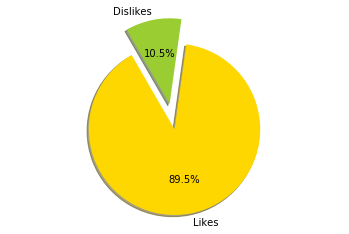

<Figure size 432x288 with 0 Axes>

In [65]:
# Data to plot
labels = 'Likes', 'Dislikes'
sizes = [total_likes_ru,total_dislikes_ru]
colors = ['gold', 'yellowgreen']
explode = (0.3, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=120)

plt.axis('equal')
plt.show()

#save pie chart as an image
plt.savefig('images/Russia.png')

In [25]:
trending_de = data_de.sort_values("views", axis=0, ascending=False)
trending_de.head(10)

,Country Code,video_id,views,likes,dislikes,comment_count
87285,DE,FlsCjmMhFmw,113876217,2811217,1470386,787174
87051,DE,FlsCjmMhFmw,100911567,2656675,1353652,682890
85892,DE,6ZfuNTqbHE8,80360459,2513103,49170,335920
86834,DE,FlsCjmMhFmw,75969469,2251819,1127810,827755
85638,DE,6ZfuNTqbHE8,74789251,2444956,46172,330710
118121,DE,7C2z4GqqS5E,73463137,4924056,156026,1084435
115934,DE,VYOjWnS4cMY,73432600,2478908,124291,263984
85431,DE,6ZfuNTqbHE8,66637636,2331354,41154,316185
117784,DE,7C2z4GqqS5E,65396157,4750254,141966,1040912
117529,DE,7C2z4GqqS5E,62796390,4470888,119046,905912


In [26]:
likes = (trending_de['views']/trending_de['likes'])
dislikes = (trending_de['views']/trending_de['dislikes'])
view = trending_de['views']

vid_id = trending_de["video_id"]
total = (trending_de['likes']+trending_de['dislikes'])
percent_likes = (trending_de['likes'] /total) *100
percent_dislikes = (trending_de['dislikes'] /total) *100

percentages_de = {"Vid Id": vid_id, "Views": view, "Views per like": likes, "Views per dislike": dislikes, "Percent of Likes": percent_likes,
               "Percent of Dislikes": percent_dislikes }

percent_data_de = pd.DataFrame(percentages_de)
percent_data_de.head()

,Vid Id,Views,Views per like,Views per dislike,Percent of Likes,Percent of Dislikes
87285,FlsCjmMhFmw,113876217,40.507800,77.446478,65.658049,34.341951
87051,FlsCjmMhFmw,100911567,37.984160,74.547644,66.245845,33.754155
85892,6ZfuNTqbHE8,80360459,31.976588,1634.339211,98.081001,1.918999
86834,FlsCjmMhFmw,75969469,33.736934,67.360166,66.629177,33.370823
85638,6ZfuNTqbHE8,74789251,30.589201,1619.796652,98.146542,1.853458


In [27]:
#total likes, dislikes, comments, and views
views_de = data_de["views"]
total_views_de = views_de.sum(axis=0)

comments_de = data_de["comment_count"]
total_comments_de = comments_de.sum(axis=0)

dislikes_de = data_de["dislikes"]
total_dislikes_de = dislikes_de.sum(axis=0)

likes_de = data_de["likes"]
total_likes_de = likes_de.sum(axis=0)

#Print out the data
print("The country Germany has",total_likes_de, "total YouTube Video likes")
print("The country Germany has",total_dislikes_de, "total YouTube Video dislikes")
print("The country Germany has",total_comments_de, "total YouTube video comments")
print("The country Germany has",total_views_de, "total YouTube video views")


The country Germany has 888368886 total YouTube Video likes
The country Germany has 56638123 total YouTube Video dislikes
The country Germany has 113162808 total YouTube video comments
The country Germany has 23903491661 total YouTube video views


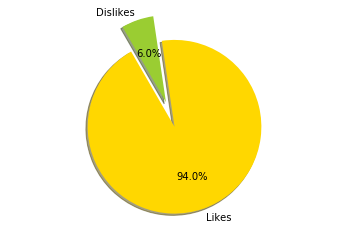

<Figure size 432x288 with 0 Axes>

In [66]:
# Data to plot
labels = 'Likes', 'Dislikes'
sizes = [total_likes_de,total_dislikes_de]
colors = ['gold', 'yellowgreen']
explode = (0.3, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=120)

plt.axis('equal')
plt.show()

#save pie chart as an image
plt.savefig('images/Germany.png')

In [29]:
trending_fr = data_fr.sort_values("views", axis=0, ascending=False)
trending_fr.head(10)

,Country Code,video_id,views,likes,dislikes,comment_count
128012,FR,FlsCjmMhFmw,100911567,2656682,1353661,682890
127710,FR,FlsCjmMhFmw,75969469,2251828,1127813,827755
158572,FR,7C2z4GqqS5E,65396157,4750254,141966,1040912
158296,FR,7C2z4GqqS5E,62796390,4470923,119052,905925
156390,FR,VYOjWnS4cMY,60776509,2183745,104379,232723
127474,FR,FlsCjmMhFmw,52611730,1891827,884962,702790
156139,FR,VYOjWnS4cMY,47169016,1841553,79716,194822
124268,FR,TyHvyGVs42U,47078714,1763400,78228,101453
144266,FR,_I_D_8Z4sJE,40567774,448371,16682,19908
147425,FR,QwievZ1Tx-8,39980116,1420090,26137,177598


In [30]:
likes = (trending_fr['views']/trending_fr['likes'])

dislikes = (trending_fr['views']/trending_fr['dislikes'])
view = trending_fr['views']

vid_id = trending_fr["video_id"]
total = (trending_fr['likes']+trending_fr['dislikes'])
percent_likes = (trending_fr['likes'] /total) *100
percent_dislikes = (trending_fr['dislikes'] /total) *100

percentages_fr = {"Vid Id": vid_id, "Views": view, "Views per like": likes, "Views per dislike": dislikes, "Percent of Likes": percent_likes,
               "Percent of Dislikes": percent_dislikes }

percent_data_fr = pd.DataFrame(percentages_fr)
percent_data_fr.head()

,Vid Id,Views,Views per like,Views per dislike,Percent of Likes,Percent of Dislikes
128012,FlsCjmMhFmw,100911567,37.984059,74.547148,66.245755,33.754245
127710,FlsCjmMhFmw,75969469,33.736799,67.359987,66.629207,33.370793
158572,7C2z4GqqS5E,65396157,13.766876,460.646613,97.098127,2.901873
158296,7C2z4GqqS5E,62796390,14.045509,527.470265,97.406260,2.593740
156390,VYOjWnS4cMY,60776509,27.831321,582.267592,95.438228,4.561772


In [31]:
#total likes, dislikes, comments, and views
views_fr = data_fr["views"]
total_views_fr = views_fr.sum(axis=0)

comments_fr = data_fr["comment_count"]
total_comments_fr = comments_fr.sum(axis=0)

dislikes_fr = data_fr["dislikes"]
total_dislikes_fr = dislikes_fr.sum(axis=0)

likes_fr= data_fr["likes"]
total_likes_fr = likes_fr.sum(axis=0)

#Print out the data
print("The country France has",total_likes_fr, "total YouTube Video likes")
print("The country France has",total_dislikes_fr, "total YouTube Video dislikes")
print("The country France has",total_comments_fr, "total YouTube video comments")
print("The country France has",total_views_fr, "total YouTube video views")


The country France has 704976683 total YouTube Video likes
The country France has 32966068 total YouTube Video dislikes
The country France has 74471680 total YouTube video comments
The country France has 16640084103 total YouTube video views


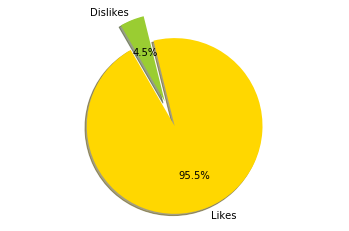

<Figure size 432x288 with 0 Axes>

In [67]:
# Data to plot
labels = 'Likes', 'Dislikes'
sizes = [total_likes_fr,total_dislikes_fr]
colors = ['gold', 'yellowgreen']
explode = (0.3, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=120)

plt.axis('equal')
plt.show()

#save pie chart as an image
plt.savefig('images/France.png')

In [33]:
trending_gb = data_gb.sort_values("views", axis=0, ascending=False)
trending_gb.head(10)

,Country Code,video_id,views,likes,dislikes,comment_count
191806,GB,_I_D_8Z4sJE,424538912,2818771,149275,99380
191606,GB,_I_D_8Z4sJE,413586699,2768654,145643,97218
191402,GB,_I_D_8Z4sJE,402650804,2719005,142006,95713
191205,GB,_I_D_8Z4sJE,392036878,2670723,138334,93834
191009,GB,_I_D_8Z4sJE,382401497,2618320,134625,92387
190818,GB,_I_D_8Z4sJE,372399338,2564815,131168,90644
190635,GB,_I_D_8Z4sJE,362111555,2506788,127178,89066
190446,GB,_I_D_8Z4sJE,349987176,2440754,122408,86952
190255,GB,_I_D_8Z4sJE,339629489,2378829,118294,85095
197854,GB,9jI-z9QN6g8,337621571,2581961,166549,113564


In [34]:
likes = (trending_gb['views']/trending_gb['likes'])

dislikes = (trending_gb['views']/trending_gb['dislikes'])
view = trending_gb['views']

vid_id = trending_gb["video_id"]
total = (trending_gb['likes']+trending_gb['dislikes'])
percent_likes = (trending_gb['likes'] /total) *100
percent_dislikes = (trending_gb['dislikes'] /total) *100

percentages_gb = {"Vid Id": vid_id, "Views": view, "Views per like": likes, "Views per dislike": dislikes, "Percent of Likes": percent_likes,
               "Percent of Dislikes": percent_dislikes }

percent_data_gb = pd.DataFrame(percentages_gb)
percent_data_gb.head()

,Vid Id,Views,Views per like,Views per dislike,Percent of Likes,Percent of Dislikes
191806,_I_D_8Z4sJE,424538912,150.611352,2844.005440,94.970597,5.029403
191606,_I_D_8Z4sJE,413586699,149.381865,2839.729331,95.002465,4.997535
191402,_I_D_8Z4sJE,402650804,148.087556,2835.449235,95.036510,4.963490
191205,_I_D_8Z4sJE,392036878,146.790542,2833.987870,95.075429,4.924571
191009,_I_D_8Z4sJE,382401497,146.048419,2840.493942,95.109782,4.890218


In [35]:
#total likes, dislikes, comments, and views
views_gb= data_gb["views"]
total_views_gb = views_gb.sum(axis=0)

comments_gb = data_gb["comment_count"]
total_comments_gb = comments_gb.sum(axis=0)

dislikes_gb = data_gb["dislikes"]
total_dislikes_gb = dislikes_gb.sum(axis=0)

likes_gb= data_gb["likes"]
total_likes_gb = likes_gb.sum(axis=0)

#Print out the data
print("The United Kingdom has",total_likes_gb, "total YouTube Video likes")
print("The United Kingdom has",total_dislikes_gb, "total YouTube Video dislikes")
print("The United Kingdom has",total_comments_gb, "total YouTube video comments")
print("The United Kingdom has",total_views_gb, "total YouTube video views")


The United Kingdom has 5202162334 total YouTube Video likes
The United Kingdom has 291893378 total YouTube Video dislikes
The United Kingdom has 507882997 total YouTube video comments
The United Kingdom has 225691823959 total YouTube video views


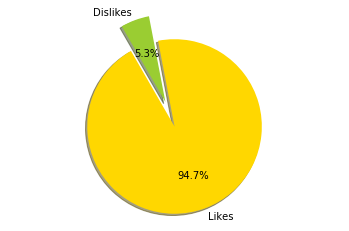

<Figure size 432x288 with 0 Axes>

In [68]:
# Data to plot
labels = 'Likes', 'Dislikes'
sizes = [total_likes_gb,total_dislikes_gb]
colors = ['gold', 'yellowgreen']
explode = (0.3, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=120)

plt.axis('equal')
plt.show()

#save pie chart as an image
plt.savefig('images/UnitedKindgom.png')

In [37]:
trending_in = data_in.sort_values("views", axis=0, ascending=False)
trending_in.head(10)

,Country Code,video_id,views,likes,dislikes,comment_count
207718,IN,FlsCjmMhFmw,125432237,2912710,1545017,807558
207429,IN,FlsCjmMhFmw,113876217,2811216,1470387,787174
207246,IN,FlsCjmMhFmw,100911567,2656672,1353650,682890
206787,IN,6ZfuNTqbHE8,89930713,2606663,53011,347982
206546,IN,6ZfuNTqbHE8,87449453,2584674,52176,341571
206323,IN,6ZfuNTqbHE8,84281319,2555411,51008,339708
206133,IN,6ZfuNTqbHE8,80360459,2513102,49170,335920
207053,IN,FlsCjmMhFmw,75969469,2251815,1127805,827755
205949,IN,6ZfuNTqbHE8,74789251,2444956,46172,330710
205766,IN,6ZfuNTqbHE8,66637636,2331352,41154,316185


In [38]:
likes = (trending_in['views']/trending_in['likes'])

dislikes = (trending_in['views']/trending_in['dislikes'])
view = trending_in['views']

vid_id = trending_in["video_id"]
total = (trending_in['likes']+trending_in['dislikes'])
percent_likes = (trending_in['likes'] /total) *100
percent_dislikes = (trending_in['dislikes'] /total) *100

percentages_in = {"Vid Id": vid_id, "Views": view, "Views per like": likes, "Views per dislike": dislikes, "Percent of Likes": percent_likes,
               "Percent of Dislikes": percent_dislikes }

percent_data_in = pd.DataFrame(percentages_in)
percent_data_in.head()

,Vid Id,Views,Views per like,Views per dislike,Percent of Likes,Percent of Dislikes
207718,FlsCjmMhFmw,125432237,43.063757,81.185021,65.340699,34.659301
207429,FlsCjmMhFmw,113876217,40.507815,77.446425,65.658026,34.341974
207246,FlsCjmMhFmw,100911567,37.984202,74.547754,66.245853,33.754147
206787,6ZfuNTqbHE8,89930713,34.500322,1696.453811,98.006861,1.993139
206546,6ZfuNTqbHE8,87449453,33.833842,1676.047474,98.021275,1.978725


In [39]:
#total likes, dislikes, comments, and views
views_in= data_in["views"]
total_views_in = views_in.sum(axis=0)

comments_in = data_in["comment_count"]
total_comments_in = comments_in.sum(axis=0)

dislikes_in = data_in["dislikes"]
total_dislikes_in = dislikes_in.sum(axis=0)

likes_in= data_in["likes"]
total_likes_in = likes_in.sum(axis=0)

#Print out the data
print("The country India has",total_likes_in, "total YouTube Video likes")
print("The country India has",total_dislikes_in, "total YouTube Video dislikes")
print("The country India has",total_comments_in, "total YouTube video comments")
print("The country India has",total_views_in, "total YouTube video views")


The country India has 988529175 total YouTube Video likes
The country India has 60587807 total YouTube Video dislikes
The country India has 98293070 total YouTube video comments
The country India has 38112307833 total YouTube video views


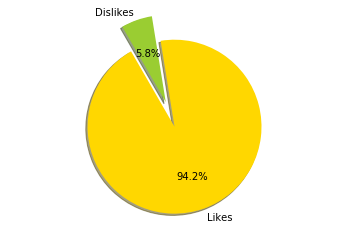

<Figure size 432x288 with 0 Axes>

In [69]:
# Data to plot
labels = 'Likes', 'Dislikes'
sizes = [total_likes_in,total_dislikes_in]
colors = ['gold', 'yellowgreen']
explode = (0.3, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=120)

plt.axis('equal')
plt.show()

#save pie chart as an image
plt.savefig('images/India.png')

In [41]:
trending_jp = data_jp.sort_values("views", axis=0, ascending=False)
trending_jp.head(10)

,Country Code,video_id,views,likes,dislikes,comment_count
337172,JP,7C2z4GqqS5E,62796390,4470923,119053,905925
337158,JP,7C2z4GqqS5E,62796390,4470923,119053,905925
337186,JP,7C2z4GqqS5E,62796390,4470923,119053,905925
337200,JP,7C2z4GqqS5E,62796390,4470923,119053,905925
333203,JP,u9Mv98Gr5pY,39128403,1077732,35764,119671
327486,JP,QwievZ1Tx-8,30180849,1242239,16903,158047
332935,JP,u9Mv98Gr5pY,27973210,850380,26543,96767
336146,JP,32sYGCOYJUM,27470728,753626,118983,401470
336251,JP,32sYGCOYJUM,27470728,753645,118989,401480
326877,JP,tCXGJQYZ9JA,24262331,1249414,64943,121243


In [42]:
likes = (trending_jp['views']/trending_jp['likes'])

dislikes = (trending_jp['views']/trending_jp['dislikes'])
view = trending_jp['views']

vid_id = trending_jp["video_id"]
total = (trending_jp['likes']+trending_jp['dislikes'])
percent_likes = (trending_jp['likes'] /total) *100
percent_dislikes = (trending_jp['dislikes'] /total) *100

percentages_jp = {"Vid Id": vid_id, "Views": view, "Views per like": likes, "Views per dislike": dislikes, "Percent of Likes": percent_likes,
               "Percent of Dislikes": percent_dislikes }

percent_data_jp = pd.DataFrame(percentages_jp)
percent_data_jp.head()

,Vid Id,Views,Views per like,Views per dislike,Percent of Likes,Percent of Dislikes
337172,7C2z4GqqS5E,62796390,14.045509,527.465835,97.406239,2.593761
337158,7C2z4GqqS5E,62796390,14.045509,527.465835,97.406239,2.593761
337186,7C2z4GqqS5E,62796390,14.045509,527.465835,97.406239,2.593761
337200,7C2z4GqqS5E,62796390,14.045509,527.465835,97.406239,2.593761
333203,u9Mv98Gr5pY,39128403,36.306246,1094.072335,96.788134,3.211866


In [43]:
#total likes, dislikes, comments, and views
views_jp= data_jp["views"]
total_views_jp = views_jp.sum(axis=0)

comments_jp = data_jp["comment_count"]
total_comments_jp = comments_jp.sum(axis=0)

dislikes_jp = data_jp["dislikes"]
total_dislikes_jp = dislikes_jp.sum(axis=0)

likes_jp= data_jp["likes"]
total_likes_jp = likes_jp.sum(axis=0)

#Print out the data
print("The country Japan has",total_likes_jp, "total YouTube Video likes")
print("The country Japan has",total_dislikes_jp, "total YouTube Video dislikes")
print("The country Japan has",total_comments_jp, "total YouTube video comments")
print("The country Japan has",total_views_jp, "total YouTube video views")


The country Japan has 161736713 total YouTube Video likes
The country Japan has 7239256 total YouTube Video dislikes
The country Japan has 24067069 total YouTube video comments
The country Japan has 4882504156 total YouTube video views


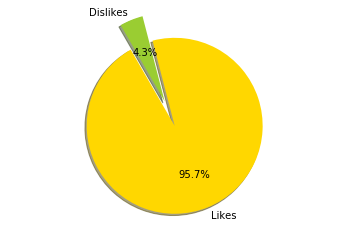

<Figure size 432x288 with 0 Axes>

In [70]:
# Data to plot
labels = 'Likes', 'Dislikes'
sizes = [total_likes_jp,total_dislikes_jp]
colors = ['gold', 'yellowgreen']
explode = (0.3, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=120)

plt.axis('equal')
plt.show()

#save pie chart as an image
plt.savefig('images/Japan.png')

In [45]:
trending_kr = data_kr.sort_values("views", axis=0, ascending=False)
trending_kr.head(10)

,Country Code,video_id,views,likes,dislikes,comment_count
346231,KR,FlsCjmMhFmw,113876217,2811223,1470388,787174
346053,KR,FlsCjmMhFmw,100911567,2656686,1353663,682890
345393,KR,6ZfuNTqbHE8,87450245,2584675,52176,341571
372219,KR,7C2z4GqqS5E,87430865,5150839,172570,1142274
345125,KR,6ZfuNTqbHE8,84281319,2555414,51008,339708
371958,KR,7C2z4GqqS5E,80738011,5053338,165854,1114800
344919,KR,6ZfuNTqbHE8,80360459,2513104,49170,335920
345828,KR,FlsCjmMhFmw,75969469,2251837,1127817,827771
344756,KR,6ZfuNTqbHE8,74789251,2444965,46172,330710
371727,KR,7C2z4GqqS5E,73463137,4924056,156026,1084435


In [46]:
likes = (trending_kr['views']/trending_kr['likes'])

dislikes = (trending_kr['views']/trending_kr['dislikes'])
view = trending_kr['views']

vid_id = trending_kr["video_id"]
total = (trending_kr['likes']+trending_kr['dislikes'])
percent_likes = (trending_kr['likes'] /total) *100
percent_dislikes = (trending_kr['dislikes'] /total) *100

percentages_kr = {"Vid Id": vid_id, "Views": view, "Views per like": likes, "Views per dislike": dislikes, "Percent of Likes": percent_likes,
               "Percent of Dislikes": percent_dislikes }

percent_data_kr = pd.DataFrame(percentages_kr)
percent_data_kr.head()

,Vid Id,Views,Views per like,Views per dislike,Percent of Likes,Percent of Dislikes
346231,FlsCjmMhFmw,113876217,40.507714,77.446373,65.658067,34.341933
346053,FlsCjmMhFmw,100911567,37.984002,74.547038,66.245756,33.754244
345393,6ZfuNTqbHE8,87450245,33.834136,1676.062653,98.021276,1.978724
372219,7C2z4GqqS5E,87430865,16.974102,506.640001,96.758280,3.241720
345125,6ZfuNTqbHE8,84281319,32.981473,1652.315696,98.042988,1.957012


In [47]:
#total likes, dislikes, comments, and views
views_kr= data_kr["views"]
total_views_kr = views_kr.sum(axis=0)

comments_kr = data_kr["comment_count"]
total_comments_kr = comments_kr.sum(axis=0)

dislikes_kr = data_kr["dislikes"]
total_dislikes_kr = dislikes_kr.sum(axis=0)

likes_kr= data_kr["likes"]
total_likes_kr = likes_kr.sum(axis=0)

#Print out the data
print("The country South Korea has",total_likes_kr, "total YouTube Video likes")
print("The country South Korea has",total_dislikes_kr, "total YouTube Video dislikes")
print("The country South Korea has",total_comments_kr, "total YouTube video comments")
print("The country South Korea has",total_views_kr, "total YouTube video views")

The country South Korea has 417598210 total YouTube Video likes
The country South Korea has 18382886 total YouTube Video dislikes
The country South Korea has 68872008 total YouTube video comments
The country South Korea has 14174488408 total YouTube video views


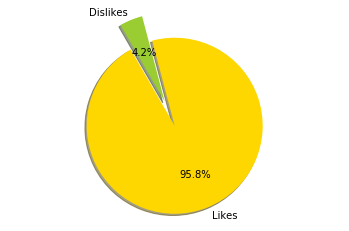

<Figure size 432x288 with 0 Axes>

In [61]:
# Data to plot
labels = 'Likes', 'Dislikes'
sizes = [total_likes_kr,total_dislikes_kr]
colors = ['gold', 'yellowgreen']
explode = (0.3, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=120)

plt.axis('equal')
plt.show()


#save pie chart as an image
plt.savefig('images/SouthKorea.png')
